# Rock Paper Scissors

In [93]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
from keras_preprocessing.image import ImageDataGenerator

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.6
Tensorflow version: 2.1.0
Keras version: 2.2.4-tf


## Loading the dataset

In [79]:
# See available datasets
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'i_natura

In [80]:
dataset, dataset_info = tfds.load(
    name='rock_paper_scissors',
    # split=tfds.Split.TRAIN,
    data_dir='.tmp',
    with_info=True
)

In [83]:
dataset

{'test': <DatasetV1Adapter shapes: {image: (300, 300, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 'train': <DatasetV1Adapter shapes: {image: (300, 300, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>}

In [84]:
dataset_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

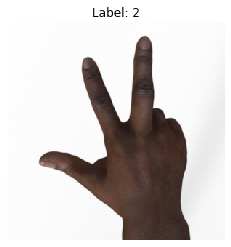

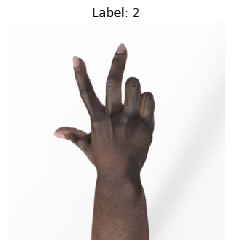

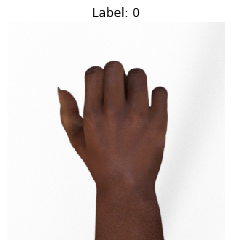

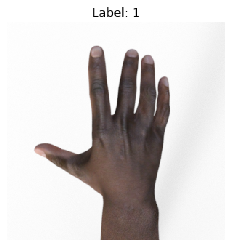

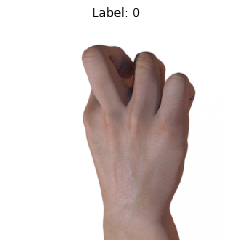

In [92]:
# ds_train = dataset['train'].shuffle(1000).batch(128).prefetch(10)
for features in dataset['train'].take(5):
    image, label = features['image'], features['label']
    plt.figure()
    plt.axis('Off')
    plt.title('Label: %d' % label.numpy())
    plt.imshow(image.numpy())

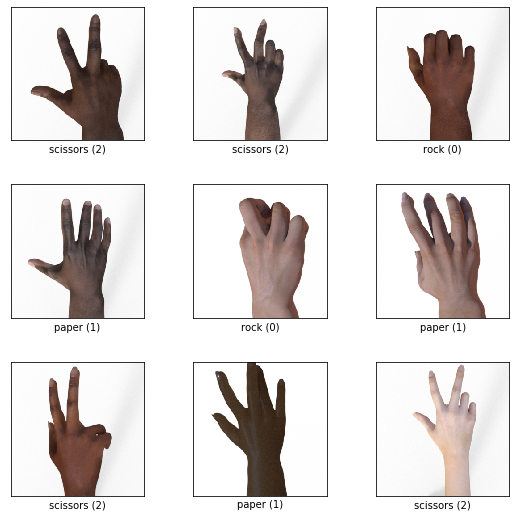

In [61]:
tfds.show_examples(dataset_info, dataset['train'])
plt.show()

In [94]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

## Creating a model

In [18]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D())

# Combined version

http://www.laurencemoroney.com/rock-paper-scissors-dataset/

In [78]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])
dataset = dataset.shuffle(5).batch(2)
list(dataset)

[<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 3], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 6], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 5], dtype=int32)>]

# Laurence version

In [22]:
!curl https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip -o .tmp/rps.zip
!curl https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip -o .tmp/rps-test-set.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  191M  100  191M    0     0  7653k      0  0:00:25  0:00:25 --:--:-- 6585k0:00:04 7514k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28.1M  100 28.1M    0     0  7826k      0  0:00:03  0:00:03 --:--:-- 7826k


In [23]:
import os
import zipfile

local_zip = '.tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.tmp/')
zip_ref.close()

local_zip = '.tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.tmp/')
zip_ref.close()

In [26]:
rock_dir = os.path.join('.tmp/rps/rock')
paper_dir = os.path.join('.tmp/rps/paper')
scissors_dir = os.path.join('.tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)), '\n')
print('total training paper images:', len(os.listdir(paper_dir)), '\n')
print('total training scissors images:', len(os.listdir(scissors_dir)), '\n')

rock_files = os.listdir(rock_dir)
print(rock_files[:10], '\n')

paper_files = os.listdir(paper_dir)
print(paper_files[:10], '\n')

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840 

total training paper images: 840 

total training scissors images: 840 

['rock04-059.png', 'rock01-108.png', 'rock04-065.png', 'rock05ck01-067.png', 'rock05ck01-073.png', 'rock04-071.png', 'rock05ck01-098.png', 'rock02-008.png', 'rock07-k03-013.png', 'rock02-034.png'] 

['paper03-088.png', 'paper05-026.png', 'paper05-032.png', 'paper03-077.png', 'paper03-063.png', 'paper02-099.png', 'paper04-037.png', 'paper04-023.png', 'paper02-066.png', 'paper02-072.png'] 

['testscissors03-040.png', 'testscissors03-054.png', 'testscissors03-068.png', 'testscissors03-083.png', 'testscissors03-097.png', 'scissors03-113.png', 'scissors03-107.png', 'testscissors02-051.png', 'testscissors02-045.png', 'scissors01-002.png']


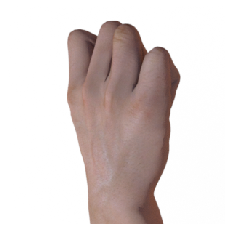

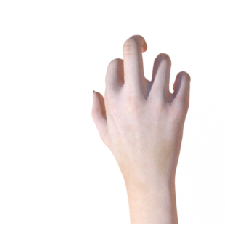

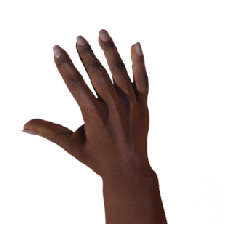

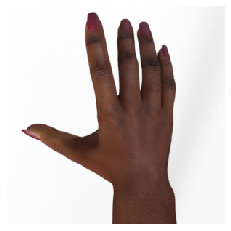

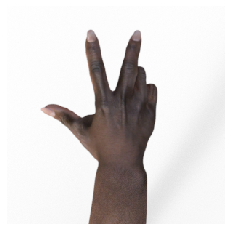

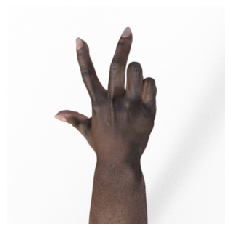

In [28]:
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock + next_paper + next_scissors):
    # print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [31]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = '.tmp/rps/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

VALIDATION_DIR = ".tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [32]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

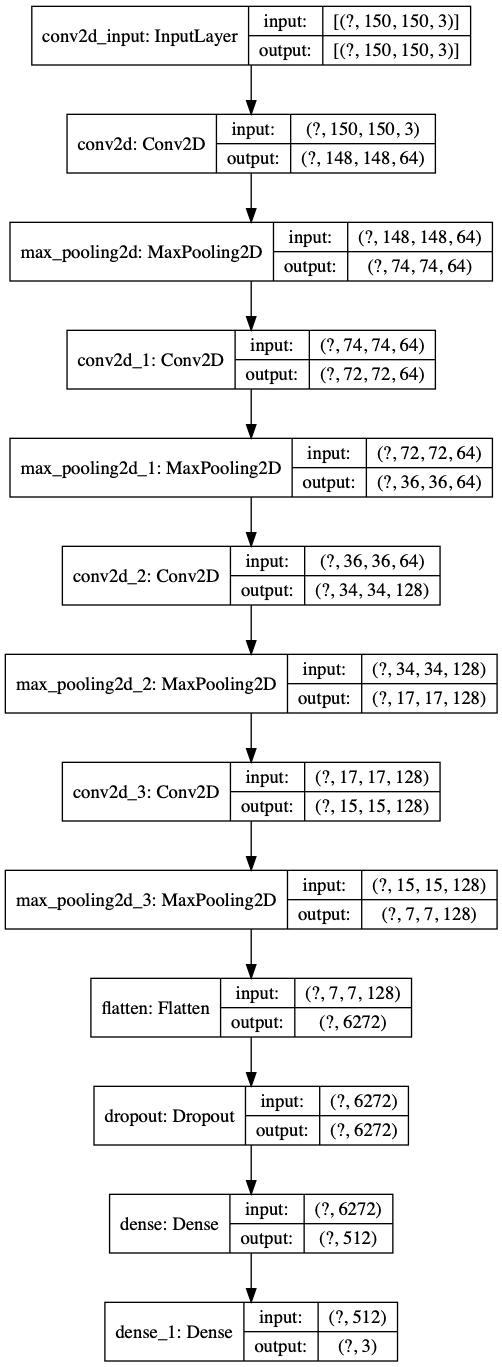

In [34]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [35]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [37]:
history = model.fit_generator(
    train_generator,
    epochs=5,
    validation_data = validation_generator,
    verbose = 1
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 79 steps, validate for 12 steps
Epoch 1/5
79/79 [==============================] - 131s 2s/step - loss: 1.0723 - accuracy: 0.4262 - val_loss: 0.7188 - val_accuracy: 0.6935
Epoch 2/5
79/79 [==============================] - 139s 2s/step - loss: 0.7885 - accuracy: 0.6548 - val_loss: 0.5179 - val_accuracy: 0.7016
Epoch 3/5
79/79 [==============================] - 119s 2s/step - loss: 0.4738 - accuracy: 0.7992 - val_loss: 0.1426 - val_accuracy: 0.9570
Epoch 4/5
79/79 [==============================] - 119s 2s/step - loss: 0.3340 - accuracy: 0.8647 - val_loss: 0.1895 - val_accuracy: 0.9005
Epoch 5/5
79/79 [==============================] - 109s 1s/step - loss: 0.2546 - accuracy: 0.9067 - val_loss: 0.3545 - val_accuracy: 0.8495


In [38]:
model.save('rps.h5')

In [41]:
history.params

{'batch_size': None,
 'epochs': 5,
 'steps': 79,
 'samples': 79,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

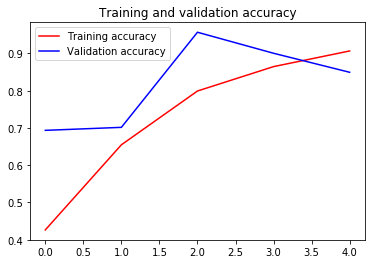

<Figure size 432x288 with 0 Axes>

In [42]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()